Average MSE for Linear Model: 0.025
Average MSE for Quadratic Model: 0.028
Average MSE for Quartic Model: 0.107


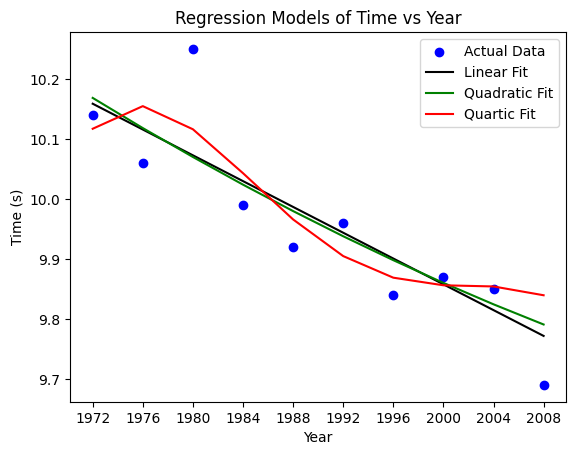

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import LeaveOneOut


loocv = LeaveOneOut()


X = np.array([1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]).reshape(-1, 1)
Y = np.array([10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85, 9.69]).reshape(-1, 1)


scaler_X, scaler_Y = MinMaxScaler(), MinMaxScaler()
X_s = scaler_X.fit_transform(X)
Y_s = scaler_Y.fit_transform(Y)


model_1 = LinearRegression()
poly_2 = PolynomialFeatures(degree=2)
model_2 = LinearRegression()
poly_4 = PolynomialFeatures(degree=4)
model_4 = LinearRegression()


mse_scores_1 = []
mse_scores_2 = []
mse_scores_4 = []



for train_index, test_index in loocv.split(X):
    X_train, X_test = X_s[train_index], X_s[test_index]
    Y_train, Y_test = Y_s[train_index], Y_s[test_index]


    model_1.fit(X_train, Y_train)
    pred_1 = model_1.predict(X_test)
    mse_scores_1.append(mean_squared_error(Y_test, pred_1))



    model_2.fit(poly_2.fit_transform(X_train), Y_train)
    pred_2 = model_2.predict(poly_2.transform(X_test))
    mse_scores_2.append(mean_squared_error(Y_test, pred_2))



    model_4.fit(poly_4.fit_transform(X_train), Y_train)
    pred_4 = model_4.predict(poly_4.transform(X_test))
    mse_scores_4.append(mean_squared_error(Y_test, pred_4))


avg_mse_1 = np.mean(mse_scores_1)
avg_mse_2 = np.mean(mse_scores_2)
avg_mse_4 = np.mean(mse_scores_4)


print(f"Average MSE for Linear Model: {avg_mse_1:.3f}")
print(f"Average MSE for Quadratic Model: {avg_mse_2:.3f}")
print(f"Average MSE for Quartic Model: {avg_mse_4:.3f}")


# Plotting
pred_1_orig = scaler_Y.inverse_transform(model_1.predict(X_s))
pred_2_orig = scaler_Y.inverse_transform(model_2.predict(poly_2.transform(X_s)))
pred_4_orig = scaler_Y.inverse_transform(model_4.predict(poly_4.transform(X_s)))

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, pred_1_orig, color='black', label='Linear Fit')
plt.plot(X, pred_2_orig, color='green', label='Quadratic Fit')
plt.plot(X, pred_4_orig, color='red', label='Quartic Fit')

plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Regression Models of Time vs Year')
plt.xticks(np.arange(1972, 2010, 4))
plt.legend()
plt.show()
